In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# October 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Mahalanobis Distance

Euclidean distance: 12.21
Mahalanobis Distance: 5.20


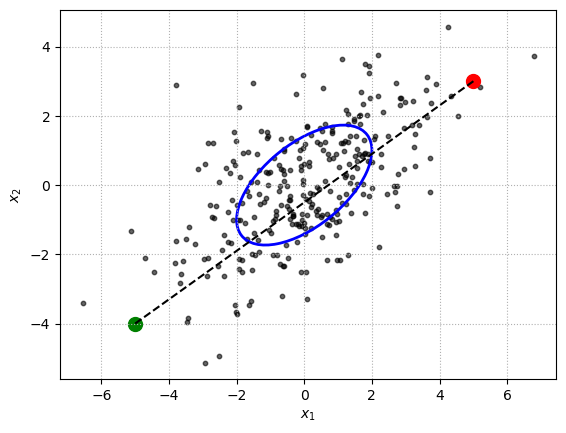

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis, euclidean
from matplotlib.patches import Ellipse

# Generate random 2D data points with correlation
np.random.seed(42)
mean = [0, 0]
cov = [[4, 2], [2, 3]]  # Covariance matrix with correlations
X = np.random.multivariate_normal(mean, cov, 300)

# Define two distant query points
x = np.array([-5, -4])
y = np.array([5, 3])

# Calculate Mahalanobis and Euclidean distances
inv_cov_matrix = np.linalg.inv(cov)
mahal_dist = mahalanobis(x, y, inv_cov_matrix)
euclid_dist = euclidean(x, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], color='black', s=10, alpha=0.6, label='Data Points')

# Highlight the two query points
plt.scatter(*x, color='green', s=100, label='Point (-4, -4)')
plt.scatter(*y, color='red', s=100, label='Point (4, 3)')

# Draw the covariance ellipse (Mahalanobis contour)
eigvals, eigvecs = np.linalg.eigh(cov)
angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
width, height = 2 * np.sqrt(eigvals)
ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                  edgecolor='blue', fc='None', lw=2, label='Mahalanobis Contour')
plt.gca().add_patch(ellipse)

# Draw the Euclidean distance line
plt.plot([x[0], y[0]], [x[1], y[1]], 'k--', label=f'Euclidean Distance')

print(f'Euclidean distance: {euclid_dist:.2f}')
print(f'Mahalanobis Distance: {mahal_dist:.2f}')

# Formatting the plot
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True, linestyle=':')

plt.savefig('figures/mahalanobis_distance.pdf')

Sklearn Metrics

In [4]:
from sklearn.metrics.pairwise import manhattan_distances

X = np.array([[2, 5, 8]])
Y = np.array([[3, 5, 1]])
print(manhattan_distances(X, Y))

[[8.]]


In [5]:
from sklearn.metrics import pairwise_distances

X = [[1, 0, 1], [0, 1, 1]]
Y = [[1, 1, 0], [0, 1, 0]]
print(pairwise_distances(X, Y, metric='hamming'))

[[0.66666667 1.        ]
 [0.66666667 0.33333333]]


In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(metric='manhattan')